# Projet : Cooperative kernel regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

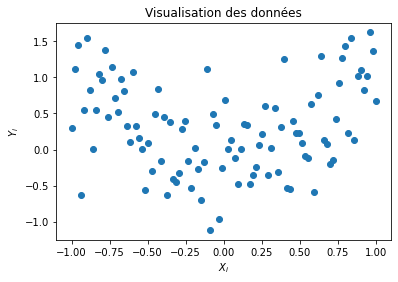

In [2]:
with open("first_database.pkl", "rb") as f:
    x,y = pickle.load(f)

X = x[:100]
Y = y[:100]
stack = np.stack([X,Y]).T
np.random.shuffle(stack)
x_shuffle = stack.T[0]
y_shuffle = stack.T[1]


plt.scatter(x_shuffle,y_shuffle)
plt.title("Visualisation des données")
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.show()


In [5]:
def kernel(x,y):
    return np.exp(-(x-y)**2)

In [12]:
matrixKmm = np.array([[kernel(x_shuffle[i],x_shuffle[j])for j in range(10)]for i in range(10)])
matrixKnm = np.array([[kernel(x_shuffle[i],x_shuffle[j])for j in range(10)]for i in range(100)])

KnmTKnm = np.dot(matrixKnm.T,matrixKnm)
np.shape(KnmTKnm)

inverse = np.linalg.inv(KnmTKnm/0.25 + matrixKmm)
YTKnm = np.dot(y_shuffle.T,matrixKnm)
# np.shape(YTKnm)
solution = np.dot(inverse,YTKnm)/0.25
print(np.linalg.norm(solution))
print(solution)

132587.5573261096
[ 2.27951660e+01  4.90206299e+01 -5.76328750e+04 -5.15402500e+04
 -8.12326660e+01 -7.20845703e+02 -4.98817139e+01  1.91625391e+03
  1.07690250e+05  3.48000977e+02]


Convexité et smoothness

In [8]:
valeur_propre_minimum = np.min(np.linalg.eigvals(matrixKmm))
valeur_propre_maximum = np.max(np.linalg.eigvals(matrixKmm))
print(valeur_propre_minimum,valeur_propre_maximum)


1.1500762196963072e-14 7.0336675649960645
